# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Mayang Gumelar]
- **Email:** [gumelarmayang@gmail.com]
- **ID Dicoding:** [mayanggumelarr]

## Menentukan Pertanyaan Bisnis

1. Bagaimana trend perentalan sepeda bulanan selama periode analisis jika dilihat dari casual maupun registered?
2. Bagaimana perbandingan peminjaman sepeda jika dilihat dari sisi weekend dan weekday? Mana yang lebih tinggi?
3. Berdasarkan perbedaan musim/cuaca, musim/cuaca mana yang paling menghasilkan peminjaman tertinggi dan terendah?
4. Di jam-jam berapakah peminjaman sepeda meningkat dan menurun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
# data perhari
day_data = pd.read_csv("dataset/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# data perjam
hour_data = pd.read_csv("dataset/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- data rental per-hari disimpan dalam bentuk dataframe dan ditampung dalam variabel day_data 
- data rental per-jam disimpan dalam bentuk dataframe dan ditampung dalam variabel hour_data
- terdapat perbedaan panjang data (banyak kolom) antara keduanya, ini karena pada hour_date terdapat kolom tambahan untuk 'jam'

### Assessing Data

In [4]:
# day_data info
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# statistik deskriptif day_data
print(f"Duplikasi data peminjaman perhari: {day_data.duplicated().sum()}")
day_data.describe(include="all")

Duplikasi data peminjaman perhari: 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1/1/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [6]:
# hour_data info
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# statistik deskriptif hour_data
print(f"Duplikasi data peminjaman perhari: {hour_data.duplicated().sum()}")
hour_data.describe(include="all")

Duplikasi data peminjaman perhari: 0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,12/31/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- date_data terdiri dari 731 sampel, 16 feature, tidak ada missing values, tidak ada duplikasi
- hour_data terdiri dari 17.379 sampel, 17 feature, tidak ada missing values, tidak ada duplikasi
- feature dtday di kedua tabel masih bertipe data objek, seharusnya datetime
- semua nilai pada feature akurat dan tidak ada yang tidak masuk akal

### Cleaning Data

In [8]:
# cleaning data day_data
# konversi format dtday dari objek ke format datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [9]:
day_data.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [10]:
# cleaning data hour_data
# konversi format dtday dari objek ke format datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

In [11]:
hour_data.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


In [12]:
# save data bersih
day_data.to_csv('day_clean.csv')
hour_data.to_csv('hour_clean.csv')

**Insight:**
- format object dteday pada data_day telah dirubah ke format datetime
- format object dteday pada hour_day telah dirubah juga ke format datetime
- tidak ada proses cleaning lain karena data terhitung bersih

## Exploratory Data Analysis (EDA)

### Explore Trend Perentalan Berdasarkan Bulan (Tahun 1 dan 2)

In [13]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# Mencari trend peminjaman pertahun (casual dan registered)
print("Trend Perentalan (Tahun): ")
all_year = day_data.groupby("yr").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt': 'sum'
}).reset_index()

all_year.sort_values(by='cnt', ascending=False)

Trend Perentalan (Tahun): 


,yr,casual,registered,cnt
1,1,372765,1676811,2049576
0,0,247252,995851,1243103


In [15]:
# Mencari trend peminjaman pertahun (casual dan registered)
print("Trend Perentalan All Years (Bulan): ")
all_year = day_data.groupby("mnth").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt': 'sum'
}).reset_index()

all_year.sort_values(by='cnt', ascending=False)

Trend Perentalan All Years (Bulan): 


,mnth,casual,registered,cnt
7,8,72039,279155,351194
5,6,73906,272436,346342
8,9,70323,275668,345991
6,7,78157,266791,344948
4,5,75285,256401,331686
9,10,59760,262592,322352
3,4,60802,208292,269094
10,11,36603,218228,254831
2,3,44444,184476,228920
11,12,21693,189343,211036


In [16]:
year_1 = day_data[day_data['yr'] == 0]
year_2 = day_data[day_data['yr'] == 1]

In [17]:
print("Tred Perentalan tahun pertama: ")
year1 = year_1.groupby("mnth").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).reset_index()

year1.sort_values(by='cnt', ascending=False)

Tred Perentalan tahun pertama: 


,mnth,casual,registered,cnt
5,6,30612,112900,143512
6,7,36452,104889,141341
7,8,28842,107849,136691
4,5,31050,104771,135821
8,9,26545,100873,127418
9,10,25222,98289,123511
10,11,15594,86573,102167
3,4,22346,72524,94870
11,12,8448,78875,87323
2,3,12826,51219,64045


In [18]:
print("Tred Perentalan tahun kedua: ")
year2 = year_2.groupby("mnth").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).reset_index()
year2.sort_values(by='cnt', ascending=False)

Tred Perentalan tahun kedua: 


,mnth,casual,registered,cnt
8,9,43778,174795,218573
7,8,43197,171306,214503
6,7,41705,161902,203607
5,6,43294,159536,202830
9,10,34538,164303,198841
4,5,44235,151630,195865
3,4,38456,135768,174224
2,3,31618,133257,164875
10,11,21009,131655,152664
11,12,13245,110468,123713


### Explore Perbandingan Perentalan Weekday dan Weekend

In [19]:
week_rent = day_data.groupby("workingday").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).reset_index()

print('Perentalan berdasarkan hari:')
week_rent

Perentalan berdasarkan hari:


,workingday,casual,registered,cnt
0,0,316732,683537,1000269
1,1,303285,1989125,2292410


### Trend Perentalan Sepeda berdasarkan Musim

In [20]:
season = day_data.groupby("season").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).reset_index()

print('Trend Perentalan Musiman:')
season.sort_values(by='cnt', ascending=False)

Trend Perentalan Musiman:


,season,casual,registered,cnt
2,3,226091,835038,1061129
1,2,203522,715067,918589
3,4,129782,711831,841613
0,1,60622,410726,471348


### Jam-Jam Peminjaman Ramai dan Sepi?

In [21]:
hour_data.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [22]:
hours = hour_data.groupby("hr").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).reset_index()

print("Trend perentalan berdasarkan jam: ")
hours

Trend perentalan berdasarkan jam: 


,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428
5,5,1012,13249,14261
6,6,3017,52115,55132
7,7,8037,146134,154171
8,8,15761,245240,261001
9,9,22458,136980,159438


In [23]:
# Jam-jam paling ramai
X = hours.sort_values(by='cnt', ascending=False)
X.head()

,hr,casual,registered,cnt
17,17,54220,282640,336860
18,18,44496,265276,309772
8,8,15761,245240,261001
16,16,53834,173914,227748
19,19,35505,191284,226789


In [24]:
# Jam-jam paling sepi
Y = hours.sort_values(by='cnt', ascending=True)
Y.head()

,hr,casual,registered,cnt
4,4,874,3554,4428
3,3,1893,6281,8174
5,5,1012,13249,14261
2,2,3412,12940,16352
1,1,4709,19455,24164


**Insight:**<br>
`1. Question 1 (Bagaimana trend perentalan sepeda bulanan selama periode analisis jika dilihat dari casual maupun registered?):`
- Tahun pertama:
Perentalan terminim di awal tahun, mulai meningkat di pertengahan tahun, dan kembali menurun hingga akhir tahun.
- Tahun kedua:
Perentalan meningkat dri tahun sebelumnya, Terbukti di:
bulan 12 th 1 = 87323
bulan 1 th 2 = 96744
Perentalan terus meningkat hingga bulan ke-9 (218573) dan kembali menurun dari bulan ke-10 sampai 12.

`2. Question 2 (Bagaimana perbandingan peminjaman sepeda jika dilihat dari sisi weekend dan weekday? Mana yang lebih tinggi?):`
- Casual:
Perentalan casual lebih tinggi di weekend(316732) dibandingkan weekday(303285)
- Registered:
Perentalan terdaftar member lebih tinggi di weekday(1989125) dibandingkan weekend(683537)
- Overall:
Perentalan pada weekend 2x lipat lebih banyak dari weekend

`3. Question 3 (Berdasarkan perbedaan musim/cuaca, musim/cuaca mana yang paling menghasilkan peminjaman tertinggi dan terendah?):`
Perentalan diurutkan dari tertinggi ke terendah berdasarkan musim:
- 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- 1 = Clear, Few clouds, Partly cloudy, Partly cloudy

Sehingga cuaca cerah mendominasi perentalan, diikuti berkabut, lalu hujan deras dengan petir, dan terakhir berawan

`4. Question 4 (Di jam-jam berapakah peminjaman sepeda meningkat dan menurun?):`
- Jam2 perentalan paling ramai adalah: 17, 18, 8, 16, 19 (descending)
- Jam2 perentalan paling sepi: 4, 3, 5, 2, 1 (ascending)
Insight lain:
- Perentalan paling sedikit di jam 4 pagi, lalu terus meningkat hingga jam 8 pagi. Naik turun tapi tetap tinggi
  hingga jam 15 sore. 
- Peerentalan semakin meningkat dari jam 16 dan puncaknya jam 17, lalu menurun lagi hingga tengah malam.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend perentalan sepeda bulanan selama periode analisis jika dilihat dari casual maupun registered?

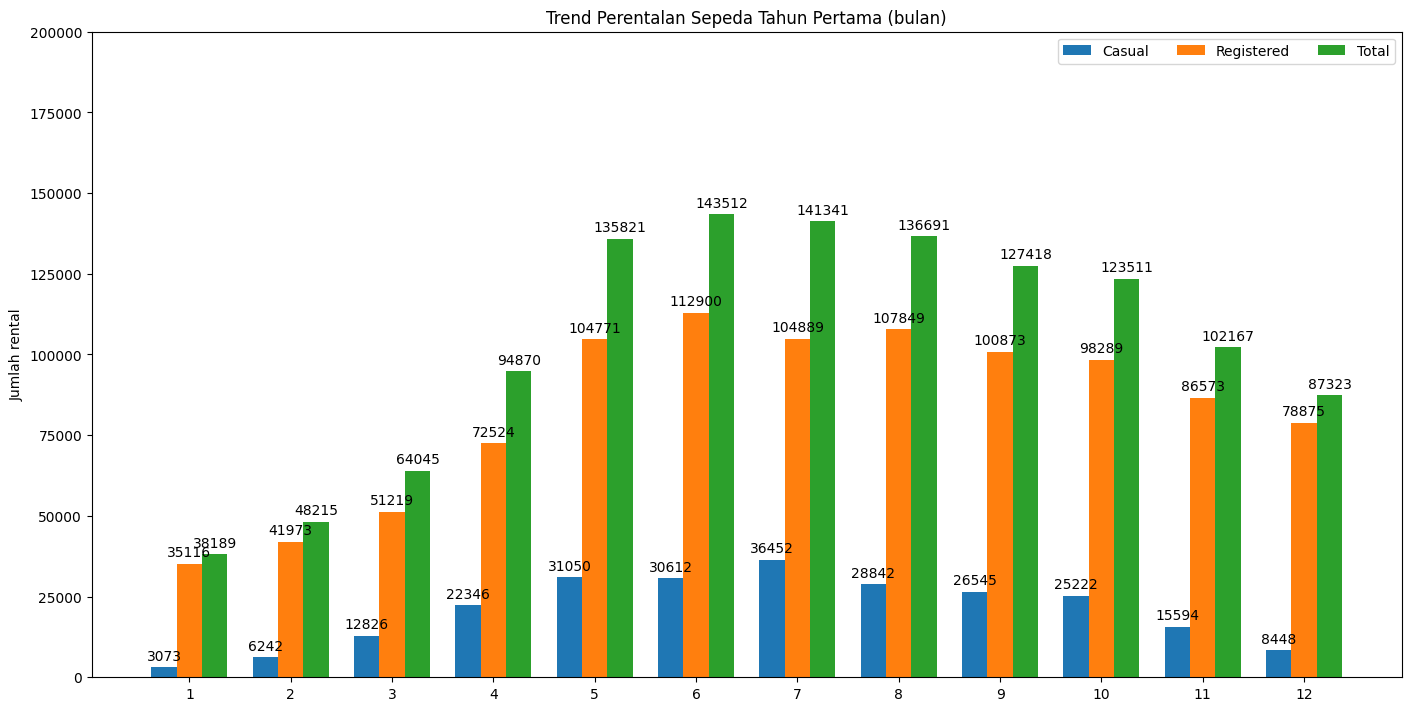

In [25]:
month = year1['mnth']
renter = year1[['casual', 'registered', 'cnt']]

x = np.arange(len(month))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7), layout='constrained')

legend_map = {
    'casual' : 'Casual',
    'registered' : 'Registered',
    'cnt' : 'Total'
}

for attribute, measurement in renter.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=legend_map[attribute])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Jumlah rental')
ax.set_title('Trend Perentalan Sepeda Tahun Pertama (bulan)')
ax.set_xticks(x + width, month)
ax.legend(loc='best', ncols=3)
ax.set_ylim(0, 200000)

plt.show()

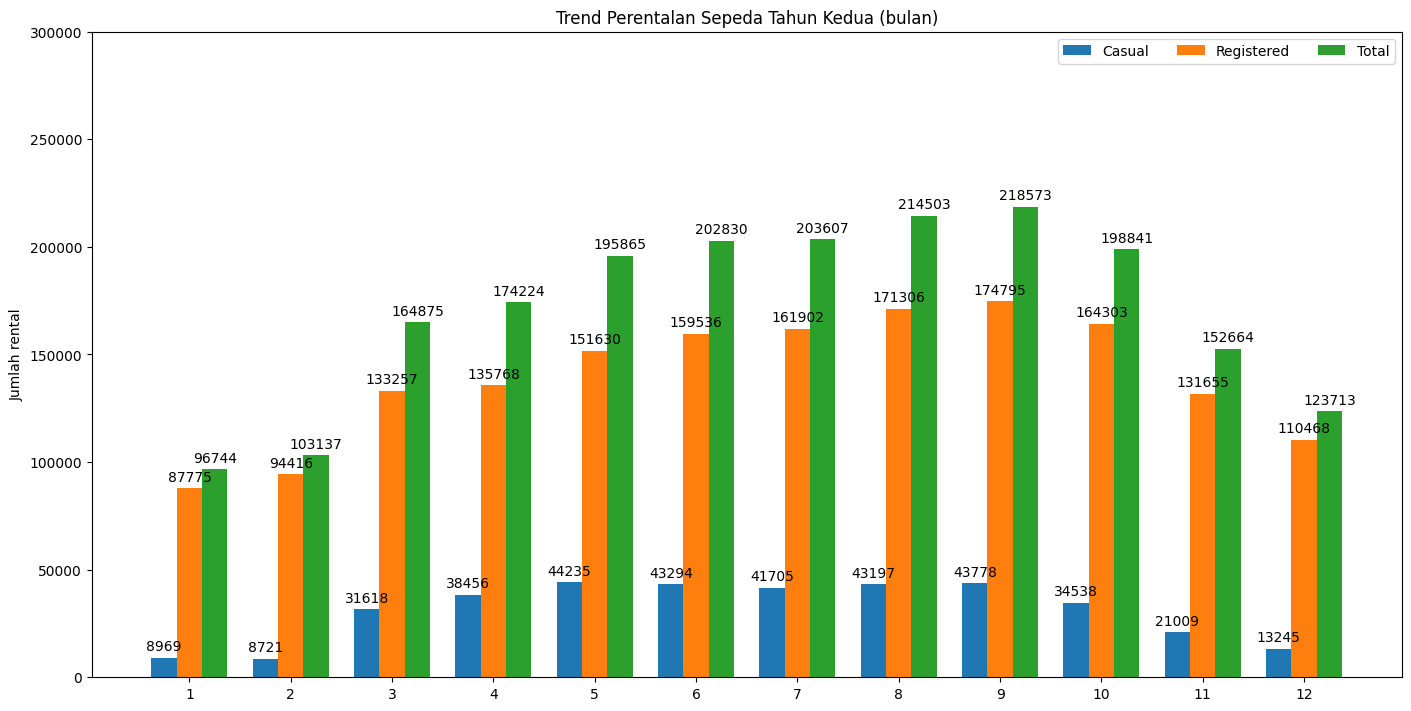

In [26]:
month = year2['mnth']
renter = year2[['casual', 'registered', 'cnt']]

x = np.arange(len(month))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7), layout='constrained')

legend_map = {
    'casual' : 'Casual',
    'registered' : 'Registered',
    'cnt' : 'Total'
}
for attribute, measurement in renter.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=legend_map[attribute])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Jumlah rental')
ax.set_title('Trend Perentalan Sepeda Tahun Kedua (bulan)')
ax.set_xticks(x + width, month)
ax.legend(loc='best', ncols=3)
ax.set_ylim(0, 300000)

plt.show()

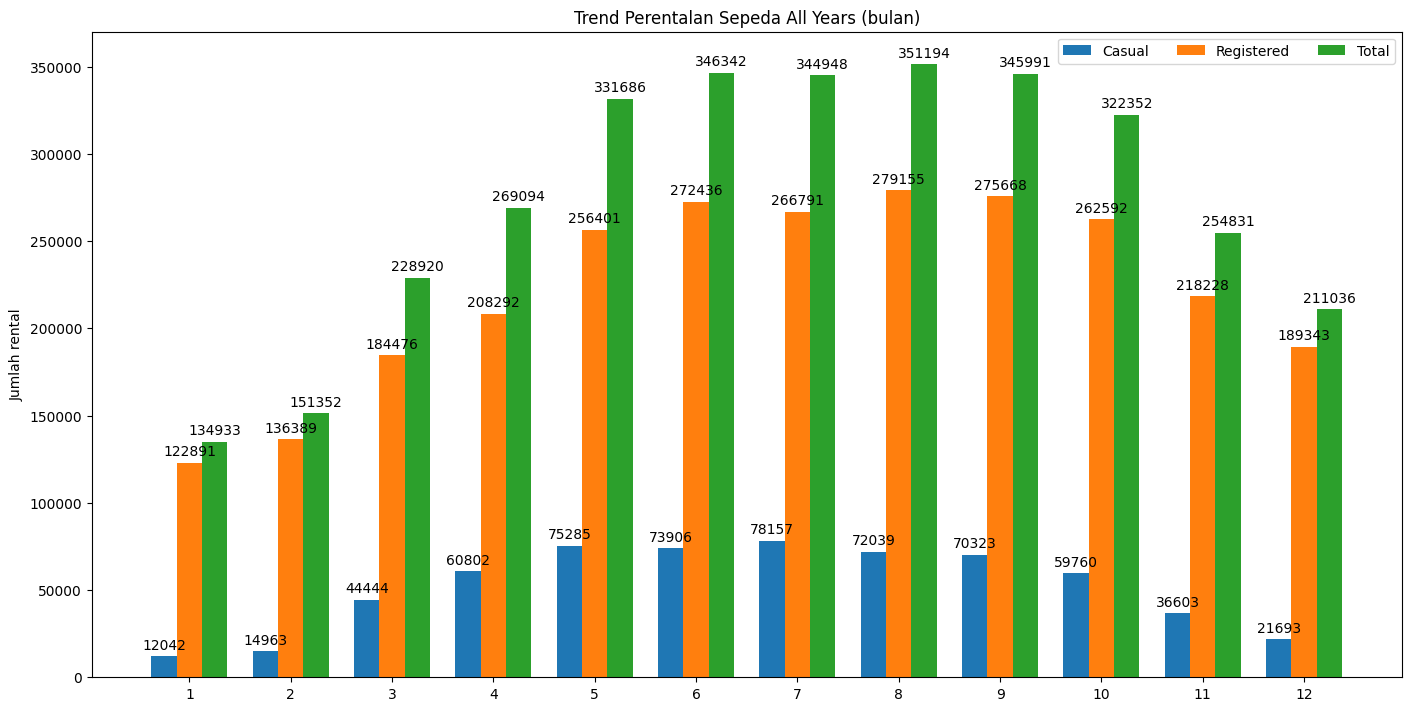

In [27]:
month = all_year['mnth']
renter = all_year[['casual', 'registered', 'cnt']]

x = np.arange(len(month))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7), layout='constrained')

legend_map = {
    'casual' : 'Casual',
    'registered' : 'Registered',
    'cnt' : 'Total'
}
for attribute, measurement in renter.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=legend_map[attribute])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Jumlah rental')
ax.set_title('Trend Perentalan Sepeda All Years (bulan)')
ax.set_xticks(x + width, month)
ax.legend(loc='best', ncols=3)
ax.set_ylim(0, 370000)

plt.show()

### Pertanyaan 2: Bagaimana perbandingan peminjaman sepeda jika dilihat dari sisi weekend dan weekday? Mana yang lebih tinggi?

In [28]:
# Data untuk pie chart (Weekday vs Weekend berdasarkan total cnt)
weekend_total = week_rent.loc[0, 'cnt']  # workingday = 0
weekday_total = week_rent.loc[1, 'cnt']  # workingday = 1
total = weekend_total + weekday_total

# Hitung ratio untuk pie chart
weekend_ratio = weekend_total / total
weekday_ratio = weekday_total / total
overall_ratios = [weekend_ratio, weekday_ratio]

# Labels dan explode
labels = ['Weekend/Holiday', 'Weekday']
explode = [0.1, 0]  

# Data untuk bar chart (breakdown Casual vs Registered)
# Weekend
weekend_casual = week_rent.loc[0, 'casual']
weekend_registered = week_rent.loc[0, 'registered']

# Weekday
weekday_casual = week_rent.loc[1, 'casual']
weekday_registered = week_rent.loc[1, 'registered']

# Hitung ratio untuk bar chart
weekend_casual_ratio = weekend_casual / weekend_total
weekend_registered_ratio = weekend_registered / weekend_total

weekday_casual_ratio = weekday_casual / weekday_total
weekday_registered_ratio = weekday_registered / weekday_total

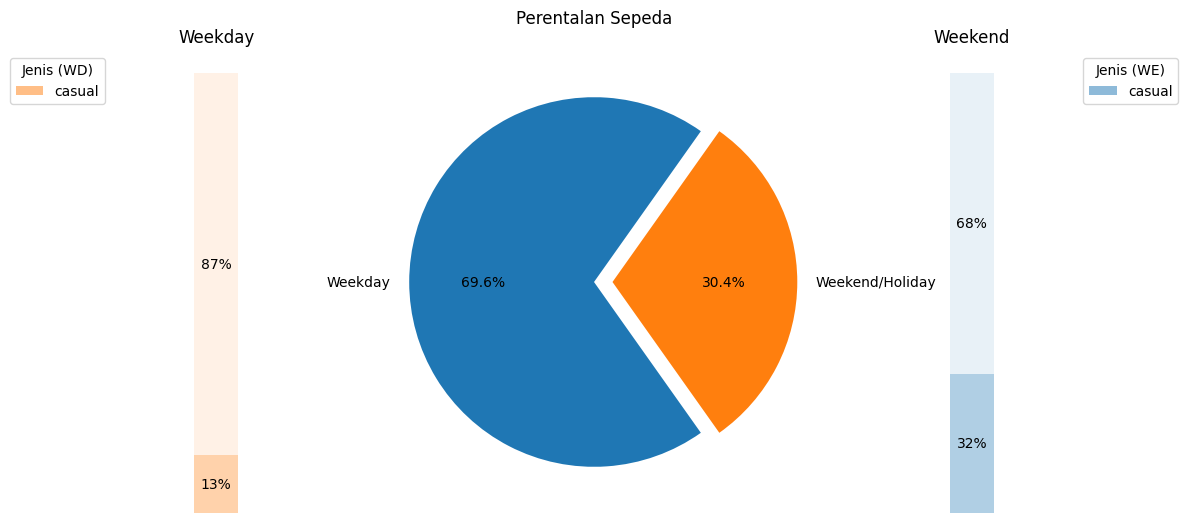

In [ ]:
# ================== SETUP FIGURE (3 KOLOM)
# Kolom 0: Bar Weekday, Kolom 1: Pie Chart, Kolom 2: Bar Weekend
fig, (ax_wd, ax_pie, ax_we) = plt.subplots(1, 3, figsize=(12, 6), 
                                           gridspec_kw={'width_ratios': [1, 3, 1]})
fig.subplots_adjust(wspace=0.1)

# ================== 2. PIE CHART (TENGAH)
angle = -180 * overall_ratios[0]
wedges, texts, autotexts = ax_pie.pie(
    overall_ratios, 
    autopct='%1.1f%%', 
    startangle=angle,
    labels=labels, 
    explode=explode,
    colors=['C1', 'C0'] # Pastikan warna sinkron (C1 Oranye = Weekday, C0 Biru = Weekend)
)
ax_pie.set_title("Perentalan Sepeda", pad=20)

# ================== BAR WEEKDAY (KIRI)
group_ratios_weekday = [weekday_casual_ratio, weekday_registered_ratio]
group_labels_weekday = ['casual', 'registered']
width = 0.5
bottom = 1

for i, (height, label) in enumerate(reversed(list(zip(group_ratios_weekday, group_labels_weekday)))):
    bottom -= height
    bc = ax_wd.bar(
        0, height, width,
        bottom=bottom,
        color='C1', 
        alpha=0.1 + 0.25 * i,
        label=label if i == 1 else ""
    )
    ax_wd.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax_wd.set_title('Weekday')
ax_wd.set_xlim(-1, 1)
ax_wd.axis('off')

# ================== BAR WEEKEND (KANAN)
group_ratios_weekend = [weekend_casual_ratio, weekend_registered_ratio]
group_labels_weekend = ['casual', 'registered']
bottom = 1

for i, (height, label) in enumerate(reversed(list(zip(group_ratios_weekend, group_labels_weekend)))):
    bottom -= height
    bc = ax_we.bar(
        0, height, width,
        bottom=bottom,
        color='C0', 
        alpha=0.1 + 0.25 * i,
        label=label if i == 1 else ""
    )
    ax_we.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax_we.set_title('Weekend')
ax_we.set_xlim(-1, 1)
ax_we.axis('off')

# ================== 5. FINAL LEGEND SETTINGS
# Menghilangkan transparansi pada legend agar warna kotak jelas
leg_wd = ax_wd.legend(loc='upper right', bbox_to_anchor=(-0.1, 1), title="Jenis (WD)")
for lh in leg_wd.legend_handles: 
    lh.set_alpha(0.5) 

leg_we = ax_we.legend(loc='upper left', bbox_to_anchor=(1.1, 1), title="Jenis (WE)")
for lh in leg_we.legend_handles: 
    lh.set_alpha(0.5) 
plt.show()

### Pertanyaan 3: Berdasarkan perbedaan musim/cuaca, musim/cuaca mana yang paling menghasilkan peminjaman tertinggi dan terendah?

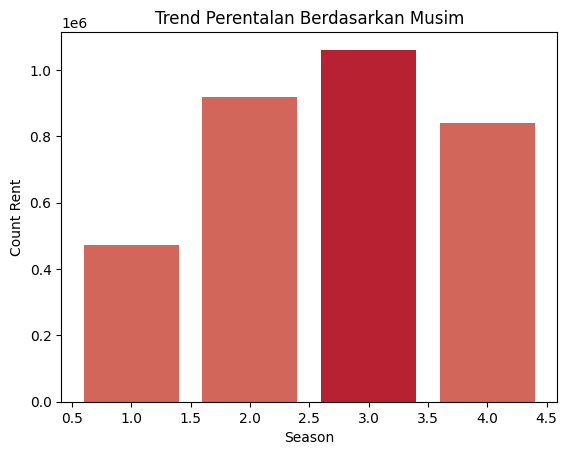

In [30]:
seasons = season['season']
rent = season['cnt']

colors = ['#D2665A', '#D2665A', '#B82132', '#D2665A']
plt.bar(x=seasons, height=rent, color=colors)
plt.xlabel('Season')
plt.ylabel('Count Rent')
plt.title('Trend Perentalan Berdasarkan Musim')
plt.show()

### Pertanyaan 4: Di jam-jam berapakah peminjaman sepeda meningkat dan menurun?

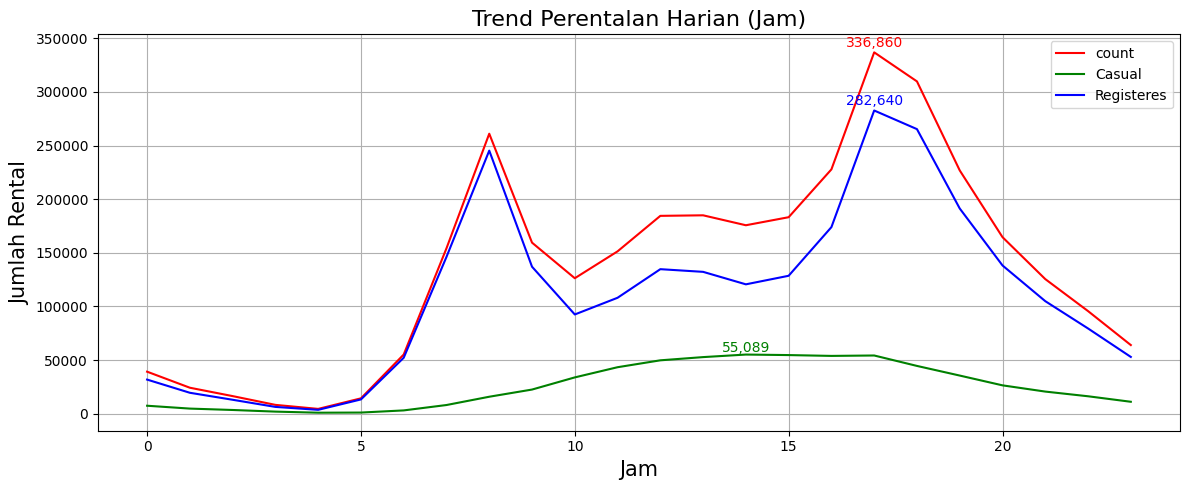

In [31]:
max_count = hours['cnt'].max()
x_count = hours.loc[hours['cnt'].idxmax(), 'hr']

max_casual = hours['casual'].max()
x_casual = hours.loc[hours['casual'].idxmax(), 'hr']

max_registered = hours['registered'].max()
x_registered = hours.loc[hours['registered'].idxmax(), 'hr']

plt.figure(figsize=(12, 5))
plt.plot(hours['hr'], hours['cnt'], label='count', color='red')
plt.plot(hours['hr'], hours['casual'], label='Casual', color='green')
plt.plot(hours['hr'], hours['registered'], label='Registeres', color='blue')
plt.xlabel('Jam', fontsize=15)
plt.ylabel('Jumlah Rental', fontsize=15)
plt.title(f'Trend Perentalan Harian (Jam)', fontsize=16)
plt.grid(visible=True)
plt.legend()

plt.text(x_count, max_count + 5000, f"{max_count:,}", color='red', ha='center')
plt.text(x_casual, max_casual + 2000, f"{max_casual:,}", color='green', ha='center')
plt.text(x_registered, max_registered + 5000, f"{max_registered:,}", color='blue', ha='center')
plt.tight_layout()
plt.show()

**Insight:**
- (Question 1) Trend Perentalan Tahun Pertama dan Kedua (perbulan) = divisualisasikan melalui bar chart dengan multibar per bulannya (casual, registered, count). Ini akan memudahkan analisis karena melalui barchart dan perbedaan warna bar akan langsung bisa tertangkap perbandingan dan naik turunnya trend perentalan <br>

- (Question 2) Perbandingan Perentalan di Weekday dan Weekend = divisualisasikan dengan pie chart karena memang hanya terdiri dari dua kelas. Lalu ditambahkan bar chart untuk kelas weekend (keterangan perbandingan casual dan registered). Ini bertujuan menambah wawasan terkait evaluasi dan strategi peningkatan rental di day weekend <br>

- (Question 3) Trend Perentalan berdasarkan musim = divisualisasikan dengan bar chart dan penekanan warna pada season dengan jumlah perentalan tertinggi. Ini akan sangat mempermudah siapapun yang melihat untuk mengetahui di musim/cuaca seperti apa tingkat perentalan naik dan turun <br>

- (Question 4) Tren Perentalan Berdasarkan Jam (Harian) = divisualisasikan dengan line chart yang cocok untuk trend time visualization. Line terdiri dari 3 line yakni hijau(casual), biru(registered), dan merah(count). Ditambahkan pula annot untuk puncak setiap line yang merepresentasikan nilai maximum <br>

## Analisis Lanjutan (Opsional)

**ANALISIS REVENUE (DUMMY)**

Karena tidak ada label/kolom harga rental pada dataset. Maka tidak bisa menghitung revenue. Oleh karena itu, saya akan mengasumsikan harga sewa.<br>
- Casual = $5 per 1 jam
- Registered = $3 per 1 jam

**Sekali lagi ini hanya asumsi berdasarkan harga-harga sewa sepeda di daerah washington**

In [32]:
day_copy = day_data.copy()
day_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
# Membuat kolom harga untuk harga casual dan registered

day_copy['casualPrice'] = day_copy['casual'] * 5
day_copy['registeredPrice'] = day_copy['registered'] * 3
day_copy['totalPrice'] = day_copy['casualPrice'] + day_copy['registeredPrice']
day_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casualPrice,registeredPrice,totalPrice
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1655,1962,3617
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,655,2010,2665
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,600,3687,4287
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,540,4362,4902
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,410,4554,4964


In [34]:
# simpan ke bentuk csv
day_copy.to_csv('day_data_with_price.csv')

In [35]:
tahun1 = day_copy[day_copy['yr'] == 0]
tahun2 = day_copy[day_copy['yr'] == 1]

In [36]:
# revenue berdasarkan bulan (tahun 1)
reve_tahun1 = tahun1.groupby("mnth").agg({
    'casualPrice':'sum',
    'registeredPrice':'sum',
    'totalPrice':'sum'
}).reset_index()
 
reve_tahun1.sort_values(by='totalPrice', ascending=False)

,mnth,casualPrice,registeredPrice,totalPrice
6,7,182260,314667,496927
5,6,153060,338700,491760
4,5,155250,314313,469563
7,8,144210,323547,467757
8,9,132725,302619,435344
9,10,126110,294867,420977
10,11,77970,259719,337689
3,4,111730,217572,329302
11,12,42240,236625,278865
2,3,64130,153657,217787


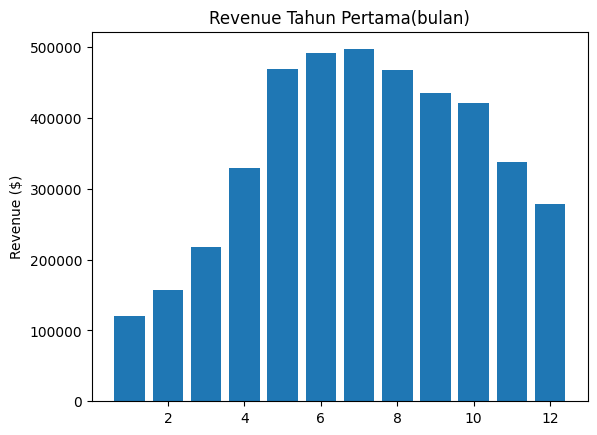

In [37]:
mo1 = reve_tahun1['mnth']
re1 = reve_tahun1['totalPrice']

plt.bar(x=mo1, height=re1)
plt.ylabel('Revenue ($)')
plt.title('Revenue Tahun Pertama(bulan)')
plt.show()

In [38]:
# revenue berdasarkan bulan (tahun 2)
reve_tahun2 = tahun2.groupby("mnth").agg({
    'casualPrice':'sum',
    'registeredPrice':'sum',
    'totalPrice':'sum'
}).reset_index()
 
reve_tahun2.sort_values(by='totalPrice', ascending=False)

,mnth,casualPrice,registeredPrice,totalPrice
8,9,218890,524385,743275
7,8,215985,513918,729903
5,6,216470,478608,695078
6,7,208525,485706,694231
4,5,221175,454890,676065
9,10,172690,492909,665599
3,4,192280,407304,599584
2,3,158090,399771,557861
10,11,105045,394965,500010
11,12,66225,331404,397629


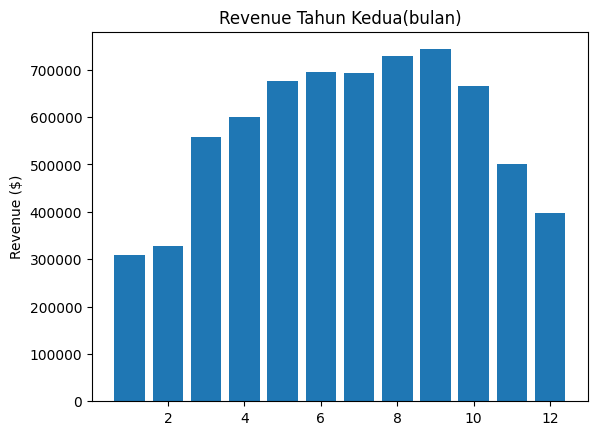

In [39]:
mo2 = reve_tahun2['mnth']
re2 = reve_tahun2['totalPrice']

plt.bar(x=mo2, height=re2)
plt.ylabel('Revenue ($)')
plt.title('Revenue Tahun Kedua(bulan)')
plt.show()

**REVENUE PER-USER**

In [40]:
# revenue per casualuser
day_copy["revenue_per_casualuser"] = day_copy["casualPrice"] / day_copy["casual"]
day_copy.head()

# revenue per registereduser
day_copy["revenue_per_registereduser"] = day_copy["registeredPrice"] / day_copy["registered"]
day_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,casualPrice,registeredPrice,totalPrice,revenue_per_casualuser,revenue_per_registereduser
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,1655,1962,3617,5.0,3.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,655,2010,2665,5.0,3.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,600,3687,4287,5.0,3.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,540,4362,4902,5.0,3.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,410,4554,4964,5.0,3.0


**BUAT UNTUK JAM JUGA**

In [41]:
hours_copy = hour_data.copy()
hours_copy.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [42]:
hours_copy['casualPrice'] = hours_copy['casual'] * 5
hours_copy['registeredPrice'] = hours_copy['registered'] * 3
hours_copy['totalPrice'] = hours_copy['casualPrice'] + hours_copy['registeredPrice']
hours_copy.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casualPrice,registeredPrice,totalPrice
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,15,39,54
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,40,96,136
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,25,81,106
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,15,30,45
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0,3,3


In [43]:
# simpan ke bentuk csv
hours_copy.to_csv('hours_data_with_price.csv')

**Inisght :**
Analisis dengan Asumsi Harga Sewa
- Casual = $3/jam
- Registered = $5/jam

1. Tahun pertama
Linear dengan jumlah pe-rental, tahun pertama memiliki revenue yang rendah di awal tahun, meningkat pesat hingga bulan ke 7
dan mulai menurun hingga akhir tahun

2. Tahun kedua
Berbeda dengan tahun pertama, tahun kedua diawali dengan jumlah revenue lebih tinggi, lalu melonjak ekstrim di bulan ke-3,
terus meningkat hingga bulan ke 9, dan mulai menurun hingga akhir tahun.

Kesimpulan:
Berdasarkan pola yang ditangkap, perentalan akan sedikit berkurang di awal tahun, lalu meningkat hingga pertengahan tahun. Puncaknya di bulan 8/9
Lalu kembali turun saat akhir tahun.

## Conclusion

- `Conclution pertanyaan 1 (Trend Perentalan Bulanan)`
**Pada tahun pertama**, jumlah perentalan berada pada titik terendah di awal tahun, kemudian meningkat secara bertahap hingga pertengahan tahun, dan kembali menurun menjelang akhir tahun.

Sementara itu, **tahun kedua** menunjukkan tren yang lebih kuat, ditandai dengan lonjakan perentalan sejak awal tahun. Hal ini terlihat dari perbandingan jumlah perentalan bulan Desember tahun pertama (87.323) dengan Januari tahun kedua (96.744). Perentalan terus meningkat hingga mencapai puncak pada bulan ke-9 (218.573), sebelum mengalami penurunan pada bulan ke-10 hingga ke-12.
Temuan ini mengindikasikan adanya pertumbuhan demand secara tahunan (year-over-year growth).

- `Conclution pertanyaan 2 (Perbandingan Perentalan Weekday vs Weekend)`
Analisis berdasarkan tipe pengguna menunjukkan pola yang berbeda:

Casual users cenderung lebih aktif pada weekend, dengan total perentalan (316.732) lebih tinggi dibandingkan weekday (303.285).

Registered users lebih dominan pada weekday, dengan perentalan (1.989.125) jauh lebih tinggi dibandingkan weekend (683.537).
Secara keseluruhan, total perentalan pada weekday hampir dua kali lipat dibandingkan weekend, yang mengindikasikan bahwa pengguna terdaftar merupakan kontributor utama volume perentalan dan kemungkinan besar menggunakan layanan untuk kebutuhan rutin (komuter).

- `Conclusion pertanyaan 3 (Tren Perentalan Berdasarkan Musim)`
Perentalan tertinggi terjadi pada kondisi cuaca yang relatif nyaman seperti Clear, Few Clouds, dan Partly Cloudy, sedangkan perentalan terendah terjadi pada kondisi cuaca ekstrem seperti Heavy Rain, Snow, Fog, dan Thunderstorm.
Hal ini menunjukkan bahwa faktor cuaca memiliki pengaruh signifikan terhadap minat perentalan, di mana kondisi cuaca buruk secara konsisten menurunkan aktivitas pengguna.

- `Conclusion Pertanyaan 4 (Jam Perentalan Paling Ramai dan Sepi)`
Jam perentalan paling ramai terjadi pada jam 17, 18, 8, 16, dan 19, yang merepresentasikan jam berangkat dan pulang kerja.
Sebaliknya, jam perentalan paling sepi berada pada jam 1 hingga 5 pagi, dengan titik terendah pada jam 4 pagi.
Secara umum, perentalan meningkat mulai pagi hari hingga jam kerja, relatif stabil hingga sore hari, lalu mencapai puncaknya pada sore menjelang malam sebelum kembali menurun hingga tengah malam. <br>

`Kesimpulan Akhir`<br>
Secara keseluruhan, pola perentalan menunjukkan sifat musiman yang konsisten, di mana aktivitas perentalan `cenderung rendah di awal tahun, meningkat hingga pertengahan tahun dengan puncak pada bulan ke-8 atau ke-9, lalu kembali menurun menjelang akhir tahun.`
Pengguna **registered menjadi kontributor utama** baik dari sisi volume perentalan maupun revenue, terutama pada weekday, sementara pengguna casual lebih aktif pada weekend. Temuan ini dapat menjadi dasar dalam penyusunan strategi operasional, promosi musiman, serta optimasi harga dan ketersediaan layanan.
